#  EXPLORING DATA WITH PANDAS

## Pandas

Most of the second half of this book is focused on building various kinds of computational models that can be used to extract useful information from data. 

In the chapters following this one, we will take a quick look at `simple` ways to use `machine learning` to build models from data. 

Before doing so, however, 

we will look at a popular library **Pandas** that can be used to quickly get acquainted with a dataset before diving into more detailed analysis. 

**Pandas** is built on top of numpy. 

>The name was derived from the term **“panel data(面板数据)”**  an econometrics term for data that includes observations over multiple time periods. 

Pandas provides mechanisms to facilitate  

* **Organizing** data

* **Calculating** simple statistics about data

* **Storing** the data in formats that facility future analysis


**Install**



In [ ]:
!pip install -U pandas

## 1 DataFrames and CSV Files

Everything in Pandas is built around the type **DataFrame**

* A DataFrame is a mutable <font color="blue">two-dimensional tabular data structure(二维表)</font> with labeled axes (rows and columns). 

The following Figure shows a **DataFrame** containing information about the late rounds of the <font color="blue">2019 FIFA Women’s World Cup</font>.

![DataFrame:two-dimensional tabular ](img/fig23-1.jpg)

Each **column(列)** represents something called a **series(序列)**.

* A **name(label)** is associated with each **column**. these **names** play a role similar to that of **keys** in 
dictionaries. 

An **index** is associated with each **row(行)**. 

* By default, the indices are consecutive numbers, but they needn’t be.


The Data of the late rounds of the 2019 FIFA Women’s World Cup is stored in the CSV file of `./data/wwc2019_q-f.csv`  


In [ ]:
# %load ./data/wwc2019_q-f.csv
Round,Winner,W Goals,Loser,L Goals
Quarters,England,3,Norway,0
Quarters,USA,2,France,1
Quarters,Netherlands,2,Italy,0
Quarters,Sweden,2,Germany,1
Semis,USA,2,England,1
Semis,Netherlands,1,Sweden,0
3rd Place,Sweden,2,England,1
Championship,USA,2,Netherlands,0

While DataFrames can be built from scratch using Python code, a more common way to create a DataFrame is by reading in a 
**CSV** file. 

The DataFrame pictured in the above figure was produced using the code below and the CSV file 

In [ ]:
import pandas as pd 
wwc = pd.read_csv('./data/wwc2019_q-f.csv') 
wwc

After importing Pandas, the code uses the Pandas'function `read_csv` to read the CSV file, and then **prints** it in the tabular form shown in the above Figure.

If the DataFrame has a **large number** of rows or columns, print will replace columns and/or rows in the **center** of the DataFrame with **ellipses(...)**. 


In [ ]:
pd.set_option('display.max_rows', 6)
pd.set_option('display.max_columns', 5)
temperatures = pd.read_csv('./data/US_temperatures.csv')
temperatures

Together, a **row index** and a **column label** indicate a data **cell** (as in a spreadsheet).

* cell(row index,column label)

We discuss how to access individual cells and groups of cells in **Section 3** 

Typically, but not always, the cells in a column are all of the same type.

In the DataFrame in Figure 23-1,

* each of the cells in the **Round,Winner, and Loser** columns is of type **str**.

* The cells in the **WGoals and LGoals** columns are of type **numpy.int64** . You won’t have a problem if you think of them as Python's ints

We can directly access the **three** components of a DataFrame using the attributes 

* <font color="blue">index</font> 
 
* <font color="blue">columns </font> 

* <font color="blue">values</font> 

### index

The **index** attribute is of type **RangeIndex**. 

For example,

In [ ]:
print(type(wwc.index))
for i in wwc.index: 
    print(i) 

the value of `wwc.index` is `RangeIndex(start=0, stop=8, step=1)`

Therefore, the code will `print` the `integers 0-7` in ascending order

### columns

The **columns** attribute is of type **Index**

For example, 

In [ ]:
print(type(wwc.columns))
for c in wwc.columns: 
    print(c) 

the value `wwc.columns` is `Index(['Round', 'Winner', 'W Goals', 'Loser', 'L Goals'], dtype= 
'object')`



### values

The `values` attribute is of type `numpy.ndarray`. 


In [ ]:
print(type(wwc.values))

**numpy.ndarrays** can be **multidi**-mensional. 

The **number** of `dimensions and items` in an `ndarray` is called its `shape` and is represented by a `tuple` of non-negative integers that specify the size of each dimension. 

```python
(rows,columns)
```


In [ ]:
print(wwc.values.shape)

The value of `wwc.values` is the `two-dimensional` ndarray

* It has **eight** rows and **five** columns, its **shape** is (8, 5) 
.

In [ ]:
for v in wwc.values: 
    print(v) 

## 2 Creating Series and DataFrames 

### 1 Creating Series and DataFrames 

In practice, Pandas’ **DataFrames** are typically created by loading a dataset that has been stored as either an `SQL database`, a `CSV file`, or in a format associated with a `spreadsheet application`. 

However, it is sometimes useful to **construct** series and DataFrames using Python code. 

The expression `pd.DataFrame()` 
produces an empty DataFrame, and the statement `print(pd.DataFrame())` produces the output 

In [ ]:
df1=pd.DataFrame() 
print(df1) 

A simple way to create a **non-empty** DataFrame is to pass in a **list** 

For example,  

In [ ]:
rounds = ['Semis', 'Semis', '3rd Place', 'Championship'] 
df=pd.DataFrame(rounds)
df 

Notice that Pandas has automatically generated a **label**, albeit `not` a particularly `descriptive` one, for the DataFrame’s only column. 

To get a **more descriptive label**, we can pass in a **dictionary** `{'Round': rounds}` rather than a list. 

For example, 

In [ ]:
pd.DataFrame({'Round': rounds}) 

To directly create a DataFrame with **multiple** columns, we need only pass in a dictionary with **multiple** entries, each consisting of a column `label` as a `key` and a `list` as the `value` associated with each key.

```python
{'Round': rounds, 'Winner': teams}
```
Each of these lists must be of the same length.

For example, 

In [ ]:
rounds = ['Semis', 'Semis', '3rd Place', 'Championship'] 
teams = ['USA', 'Netherlands', 'Sweden', 'USA'] 
df = pd.DataFrame({'Round': rounds, 'Winner': teams}) 
df

###  2 add columns

Once a DataFrame has been created, it is easy to **add** columns.

For example, 
```python
df['W Goals'] = [2, 1, 0, 0] 
```

mutates `df` so that its value becomes

In [ ]:
df['W Goals'] = [2, 1, 0, 0] 
df

Just as the `values` associated with a `key` in dictionary can be replaced, the `values` associated with a `column` can be replaced.

For example, after executing the statement 
```python
df['W Goals'] = [2, 1, 2, 2]
```
 the value of `df` becomes 

In [ ]:
df['W Goals'] = [2, 1, 2,2] 
df

### 3 drop columns

It is also easy to **drop** columns from a DataFrame. The function call 

```python
df.drop('Winner', axis = 'columns')
``` 

It requires **copying** the DataFrame，leaves `df` **unchanged**. 


In [ ]:
df1=df.drop('Winner', axis = 'columns')
df1



If we had not included `axis = 'columns'`(or equivalently `axis = 1`) in the call to `drop` ,

the axis would have `defaulted` to 'rows'`(equivalent to `axis = 0`), which would have led to generating the exception `KeyError:`

```
"['Winner'] not found in axis." 
```

### 4 inplace 

If a DataFrame is large, using drop in this way is inefficient, since it requires copying the DataFrame.

The copy can be avoided by setting the `inplace` keyword argument to `drop` to `True` 

The call 
```
df.drop('Winner', axis = 'columns', inplace = True)
```
**mutates** `df` and returns `None` 


In [ ]:
df.drop('Winner', axis = 'columns', inplace = True)
df

### 5 add Rows

Rows can be added to the beginning or end of a DataFrame using the DataFrame constructor to create a new DataFrame, and then using the 
**concat** function to combine the new DataFrame with an existing DataFrame.

For example, the code 
```Python
pd.concat([pd.DataFrame(quarters_dict), df], sort = False) 
```



In [ ]:
quarters_dict = {'Round': ['Quarters']*4, 
                  'Winner': ['England', 'USA', 'Netherlands', 'Sweden'], 
                  'W Goals': [3, 2, 2, 2]} 

df = pd.concat([pd.DataFrame(quarters_dict), df], sort = False) 
df

Had the keyword argument `sort` been set to `True`,
`concat` would have also changed the order of the columns based upon the lexographic ordering of their labels. 
That is 
```python
pd.concat([pd.DataFrame(quarters_dict), df], sort = True)
```
swaps the position of the last two columns and returns the DataFrame 

If no value for sort is provided, it defaults to `False` .

In [ ]:
quarters_dict = {'Round': ['Quarters']*4, 
                  'Winner': ['England', 'USA', 'Netherlands', 'Sweden'], 
                  'W Goals': [3, 2, 2, 2]} 

df = pd.concat([pd.DataFrame(quarters_dict), df], sort = True) 
df

### 6 reset_index 

Notice that the **indices** of each of the `concatenated` DataFrames are **unchanged**. Consequently, there are **multiple** rows with the `same **index**. 

The indices can be `reset` using the `reset_index` method. 

For example, the expression 
```python
df.reset_index(drop = True) 
```
evaluates to 

In [ ]:
df1=df.reset_index(drop = True) 
df1

If `reset_index` is invoked with `drop = False`, a `new column` containing the **old indices** is added to the DataFrame. 

The column is **labeled index**.

In [ ]:
df1=df.reset_index(drop = False) 
df1

You might be wondering why Pandas even allows **duplicate** indices.

The reason is that it is often helpful to use a semantically **meaningful** index to **label rows.** 
For example, 
```
df.set_index('Round') 
```
evaluates to

In [ ]:
df2=df.set_index('Round') 
df2

## 3  Selecting Columns and Rows 



In [ ]:
import pandas as pd 
wwc = pd.read_csv('./data/wwc2019_q-f.csv') 
wwc

### 0 Selecting Columns

As is the case for other composite types in Python, **square brackets[]** are the primary mechanism for selecting parts of a DataFrame. 

To select a single column of a DataFrame, we simply place the **label** of the column in between square brackets. 
For example, 
```python
wwc['Winner'] 
```
evaluates to 

In [ ]:
wwc['Winner'] 

The type of this object is **Series** , 

In [ ]:
type(wwc['Winner']) 

i.e., it is not a DataFrame. 

A Series is a `one-dimensional` sequence of values, each of which is `labeled by an index`.

To select a single item from a Series, we place an index within square brackets following the 
series. So, 



In [ ]:
wwc['Winner'][3] 

evaluates to the string `Sweden` 
 
We can iterate over a series using a `for` loop. For example

In [ ]:
winners = '' 
for w in wwc['Winner']: 
    winners += w + ',' 
winners[:-1]

Square brackets can also be used to select `multiple` columns from a DataFrame. 

This is done by placing a list of column labels within the square brackets. 
This produces a DataFrame rather than series.

For example, the code produces the `DataFrame`

In [ ]:
wwc[['Winner', 'Loser']] 

The column labels in the list within the selection square brackets **don’t have to be in the same order** as the labels appear in the **original** DataFrame. This makes it convenient to use selection to `reorganize` the DataFrame.

For example, the code returns the DataFrame 

In [ ]:
wwc[['Round','Winner','Loser','W Goals','L Goals']] 

Note that attempting to select a `row` by putting its index inside of square brackets will not work. It will generate a 
`KeyError` exception.

Curiously, however, we can select `rows` using `slicing`. So, while 

```wwc[1]``` 

causes an exception, **KeyError: 1**

```wwc[1:2]```

produces a DataFrame with a single row, 

We discuss other ways of selecting rows in the next subsection. 

In [ ]:
wwc[1:2] 

### 1 Selection Using `loc` and `iloc `

#### 1.1 loc


The `loc`method can be used to select `rows, columns, or combinations of rows and columns` from a DataFrame.

Importantly, all selection is done using **labels**. 

This is worth emphasizing, since some of the labels (e.g., the indices) can look suspiciously like numbers. 


If `df` is a DataFrame, the expression 
```
df.loc[label] 
```
returns a **series** corresponding to the row associated with `label` in `df`


For example, the code returns the Series 

In [ ]:
wwc.loc[3] 

Notice that the column `labels` of wwc are the `index` labels for the Series, and the values associated with those labels are the values for the corresponding columns in the `row` **labeled**  `3` in `wwc`. 

### 2 Selection by Group

It is often convenient to split a DataFrame into subsets and apply some aggregation or transformation separately to each subset. The
groupby method makes it easy to do this sort of thing.

Suppose, for example, we want to know the total number of goals scored by the winning and losing teams in each round. 

binds `group_by_round` to an object of type `DataFrameGroupBy`.

We can then apply the aggregator sum to that object to generate a DataFrame.

In [ ]:
grouped_by_round = wwc.groupby('Round')
grouped_by_round.sum()

The code `wwc.groupby('Winner').mean()`

In [ ]:
wwc.groupby('Winner').mean()

From this we can easily see that `England averaged three goals` in the games it won, while shutting out its opponents.

The code ```wwc.groupby(['Loser', 'Round']).mean()```

In [ ]:
wwc.groupby(['Loser', 'Round']).mean()

From this we can easily see that `England averaged one goal in the games it lost, while giving up two`.


### 3 Selection by Content

Suppose we want to select all of the **rows** for games **won** by **Sweden** from the DataFrame in Figure 23-1. 

Since this DataFrame is a **small** one, we could look at each row and find the **indices of the rows** corresponding to those games.

Of course, that approach `doesn't` scale to **large** DataFrames. 

Fortunately, it is easy to select rows based on their **contents** using something called **Boolean indexing**

The basic idea is to write a **logical expression** referring to the values contained in the DataFrame.

That expression is then evaluated on each row of the DataFrame, and the rows for which it evaluates to `True` are selected.

The expression `wwc.loc[wwc['Winner']=='Sweden']` evaluates to the DataFram

In [ ]:
wwc.loc[wwc['Winner']=='Sweden']

Retrieving **all** of the games involving Sweden is only a little more complicated. 

The logical operators `&` (corresponding to and),`|` (corresponding to or), and `–` (corresponding to not) can be used to
form expressions. 

The expression `wwc.loc[(wwc['Winner']=='Sweden') | (wwc['Loser'] =='Sweden')]` returns

In [ ]:
wwc.loc[(wwc['Winner']=='Sweden') | (wwc['Loser'] =='Sweden')]

If we expect to do many queries selecting games in which a country participated, it might be convenient to define the function

In [ ]:
def get_country(df, country):
    """df a DataFrame with series labeled Winner and Loser
            country a str
        returns a DataFrame with all rows in which country
          appears in
           either the Winner or Loser column"""
    return df.loc[(df['Winner'] == country) | (df['Loser']== country)]

Since `get_country` returns a DataFrame, it is easy to extract the games between **pairs of teams** by composing two calls of `get_country`.

For example, evaluating `get_country(get_country(wwc,‘Sweden'),'Germany')` extracts the one game (teams play each other at most once during a knockout round) between these two teams.

In [ ]:
get_country(get_country(wwc,'Sweden'),'Germany')

Suppose we want to generalize `get_country` so that it accepts a `list` of countries as an argument and returns `all games` in which any of
the countries in the list played. 

We can do this using the `isin` method:


In [ ]:
def get_games(df, countries):
    return df[(df['Winner'].isin(countries)) | (df['Loser'].isin(countries))] 

The `isin` method filters a DataFrame by selecting only those rows with a specified value (or element of a specified collection of values)
in a specified column. 

The expression 
```python
df['Winner'].isin(countries)
```
in the implementation of `get_games` selects those rows in `df` in which the column Winner contains an element in the list countries

In [ ]:
get_games(wwc,['Sweden','Germany'])

## 4 Manipulating the Data in a DataFrame

We've now looked at some simple ways to create and select parts of DataFrames. One of the things that makes DataFrames worth
creating is the ease of extracting aggregate information from them.

Let's start by looking at some ways we might extract aggregate information from the DataFrame wwc, pictured in Figure 23-1.

The columns of a DataFrame can be operated on in ways that are analogous to the ways we operate on numpy arrays.

For example,analogous to the way the expression `2*np.array([1,2,3])` evaluates to the array `[2 4 6]`, 


In [ ]:
import numpy as np
2*np.array([1,2,3])

the expression `2*wwc['W Goals']` evaluates to the series

In [ ]:
2*wwc['W Goals']

## 5 An Extended Example

In this section we will look at two datasets, 

* one containing historical temperature data for 21 U.S. cities(20,088 dates) and 

* the other historical data about the global use of fossil fuels.

### 5.1 Temperature Data

The first two lines of code set default options that limit the number of rows and columns shown when printing DataFrames.

The function `reset_option` can be used to set an option back to the system default value.

In [1]:
import pandas as pd
pd.set_option('display.max_rows', 6)
pd.set_option('display.max_columns',10)
temperatures = pd.read_csv('./data/US_temperatures.csv')
temperatures

,Date,Albuquerque,Baltimore,Boston,Charlotte,...,San Francisco,San Juan,Seattle,St Louis,Tampa
0,19610101,-0.55,3.35,1.95,7.25,...,8.05,24.45,3.10,-0.55,15.00
1,19610102,-2.50,0.00,-0.80,4.45,...,5.85,25.00,0.55,-0.55,13.60
2,19610103,-2.50,0.85,-3.05,2.20,...,4.70,24.75,0.00,0.30,11.95
...,...,...,...,...,...,...,...,...,...,...,...
20085,20151229,-2.15,9.45,0.05,17.20,...,7.20,26.10,3.90,1.40,26.10
20086,20151230,-2.75,9.70,-0.50,18.05,...,6.90,25.80,2.30,0.60,25.55
20087,20151231,-0.75,9.75,4.45,15.30,...,7.25,25.55,1.75,-0.25,25.55


This DataFrame is organized in a way that makes it easy to see what the weather was like in different cities on specific **dates**.

For example, the query


In [2]:
temperatures.loc[temperatures['Date']==19790812][['New York','Tampa']]

,New York,Tampa
6797,15.0,25.55


tells us that on August 12, 1979, the temperature in New York was $15C$ and in Tampa $25.55C$.

Unfortunately, looking at data from 21 cities for 20,088 dates doesn't give us much direct insight into larger questions related to
temperature trends. 

Let's start by adding columns that provide **summary** information about the temperatures each day. 

The code


In [3]:
temperatures['Max T'] = temperatures.max(axis = 'columns')
temperatures['Min T'] = temperatures.min(axis = 'columns')
temperatures['Mean T'] = round(temperatures.mean(axis ='columns'), 2)
df_20000704=temperatures.loc[20000704:20000704]
df_20000704

,Date,Albuquerque,Baltimore,Boston,Charlotte,...,St Louis,Tampa,Max T,Min T,Mean T


Was the mean temperature(`Mean T`) of those 21 cities on July 4, 2000,really much **higher** than the temperature on the surface of the sun?

It seems more likely that there is a **bug** in our code.

The problem is that our DataFrame encodes **dates** as **numbers**, and these `numbers` are used to `compute the mean of each row`.



As many data sets do contain **datetime** information in one of the **columns**, pandas input function like `pandas.read_csv()` and `pandas.read_json()` can do the transformation to dates when reading the data using the `parse_dates` parameter with a list of the `columns` to read as `Timestamp`:

In [4]:
temperatures = pd.read_csv('./data/US_temperatures.csv',parse_dates=["Date"])

What is the start and end date of the time series data set we are working with?

In [5]:
temperatures["Date"].min(), temperatures["Date"].max()

(Timestamp('1961-01-01 00:00:00'), Timestamp('2015-12-31 00:00:00'))

Using `pandas.Timestamp` for datetimes enables us to calculate with date information and make them comparable. Hence, we can use this to get the length of our time series:



In [6]:
temperatures["Date"].max() - temperatures["Date"].min()

Timedelta('20087 days 00:00:00')

Conceptually, it might make more sense to think of the **date** as an **index** for a series of temperatures. So, let's change the DataFrame to make the dates indices. 

In [7]:
temperatures.set_index('Date', drop = True, inplace = True)
temperatures

,Albuquerque,Baltimore,Boston,Charlotte,Chicago,...,San Francisco,San Juan,Seattle,St Louis,Tampa
Date,,,,,,,,,,,
1961-01-01,-0.55,3.35,1.95,7.25,-4.75,...,8.05,24.45,3.10,-0.55,15.00
1961-01-02,-2.50,0.00,-0.80,4.45,-2.50,...,5.85,25.00,0.55,-0.55,13.60
1961-01-03,-2.50,0.85,-3.05,2.20,-10.80,...,4.70,24.75,0.00,0.30,11.95
...,...,...,...,...,...,...,...,...,...,...,...
2015-12-29,-2.15,9.45,0.05,17.20,1.15,...,7.20,26.10,3.90,1.40,26.10
2015-12-30,-2.75,9.70,-0.50,18.05,-2.15,...,6.90,25.80,2.30,0.60,25.55
2015-12-31,-0.75,9.75,4.45,15.30,-3.80,...,7.25,25.55,1.75,-0.25,25.55


In [8]:
temperatures['Max'] = temperatures.max(axis = 'columns')
temperatures['Min'] = temperatures.min(axis = 'columns')
temperatures['Mean T'] = round(temperatures.mean(axis = 'columns'), 2)
temperatures.loc["2007-07-04":"2007-07-04"]

,Albuquerque,Baltimore,Boston,Charlotte,Chicago,...,St Louis,Tampa,Max,Min,Mean T
Date,,,,,,,,,,,
2007-07-04,26.35,23.05,21.95,23.35,24.7,...,27.8,27.25,37.5,19.7,25.53


Why did we use **slicing** to select a `single` row?  Because we wanted to create a `DataFrame` rather than a series.



We are now in a position to start producing some <font color="blue">plots</font> showing various trends. 

For example,the followe code produces a plot that shows the seasonality of temperatures in the United States. 


<AxesSubplot:xlabel='Days Since 1/1/1961', ylabel="'Degrees C">

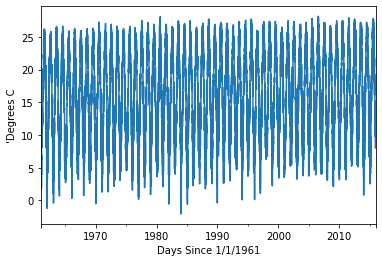

In [9]:
temperatures['Mean T'].plot(xlabel="Days Since 1/1/1961", ylabel="'Degrees C")

We can see the seasonal pattern more clearly, by **zooming** in on a few years and producing a plot using the call

<AxesSubplot:xlabel='Days Since 1/1/1961', ylabel="'Degrees C">

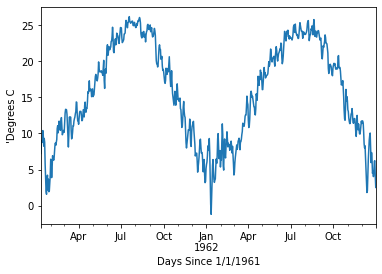

In [10]:
temperatures['Mean T'].loc["1961-01-10":"1962-12-31":].plot(xlabel="Days Since 1/1/1961", ylabel="'Degrees C")

We want to further customize, extend or save the resulting plot.

**zooming** in on a few years and producing a plot using the call

Text(0, 0.5, 'Degrees C')

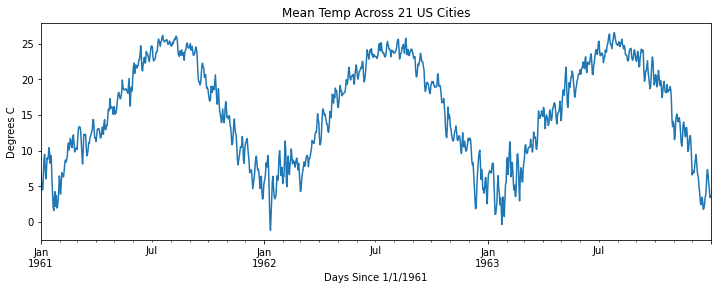

In [11]:
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(12, 4))
ax=temperatures['Mean T'].head(3*365).plot()
ax.set_title('Mean Temp Across 21 US Cities')
ax.set_xlabel('Days Since 1/1/1961')
ax.set_ylabel('Degrees C')

Over the last decades, a consensus that the Earth is warming has emerged. 

Let's see whether this data is consistent with that consensus. Since we are investigating a hypothesis about a long-term
trend, we should probably not be looking at daily or seasonalvariations in temperature. 

#### statistics grouped by category

#####    summary data for each year

Instead, let's look at **annual** data.

As a first step, let's use the data in temperatures to build a new DataFrame in which the `rows` represent **years** rather than **days**. 


I want to add a new column to the DataFrame containing only the `year` of the measurement to build the DataFrame `yearly_temps`:

```
	    Mean T	Max T	Min T
Year	
1961	15.737151	38.05	-17.25
1962	15.459205	36.95	-21.65
1963	15.570356	36.10	-24.70
```

In [12]:
temperatures["Year"]=temperatures.index.year

In [13]:
temperatures_year=temperatures.groupby([temperatures["Year"]])
temperatures_year.head()

,Albuquerque,Baltimore,Boston,Charlotte,Chicago,...,Tampa,Max,Min,Mean T,Year
Date,,,,,,,,,,,
1961-01-01,-0.55,3.35,1.95,7.25,-4.75,...,15.00,24.45,-4.75,6.86,1961
1961-01-02,-2.50,0.00,-0.80,4.45,-2.50,...,13.60,25.00,-5.00,5.29,1961
1961-01-03,-2.50,0.85,-3.05,2.20,-10.80,...,11.95,24.75,-10.80,4.50,1961
...,...,...,...,...,...,...,...,...,...,...,...
2015-01-03,-1.90,0.35,-1.35,9.70,-0.25,...,25.00,26.35,-1.90,8.53,2015
2015-01-04,-1.30,10.30,6.40,13.30,-8.00,...,23.90,26.40,-8.00,9.08,2015
2015-01-05,1.15,2.00,0.90,7.20,-16.80,...,18.60,26.10,-16.80,6.93,2015


In [14]:
yearly_temps_mean_t=temperatures.groupby([temperatures["Year"]])["Mean T"].mean()
yearly_temps_max_t=temperatures.groupby([temperatures["Year"]])["Max"].max()
yearly_temps_min_t=temperatures.groupby([temperatures["Year"]])["Min"].min()
yearly_temps=pd.DataFrame() 
yearly_temps["Mean T"]=yearly_temps_mean_t
yearly_temps["Max T"]=yearly_temps_max_t
yearly_temps["Min T"]=yearly_temps_min_t
yearly_temps

,Mean T,Max T,Min T
Year,,,
1961,15.737151,38.05,-17.25
1962,15.459205,36.95,-21.65
1963,15.570356,36.10,-24.70
...,...,...,...
2013,16.776411,40.55,-15.00
2014,16.931836,40.30,-22.70
2015,17.610466,40.55,-18.80


Now that we have the data in a convenient format, let's generate some **plots** to visualize how the temperatures change over time. 

The code  produces plots relating year to temperature measurements

* Mean and minimum annual temperatures

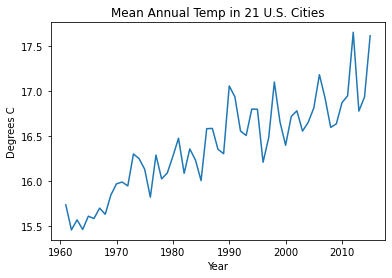

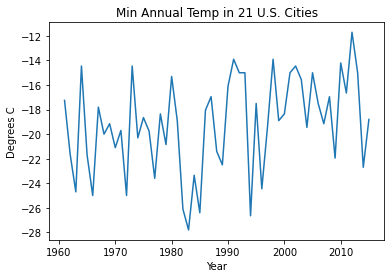

In [15]:
plt.figure(0)
plt.plot(yearly_temps.index, yearly_temps['Mean T'])
plt.title('Mean Annual Temp in 21 U.S. Cities')
plt.figure(1)
plt.plot(yearly_temps.index, yearly_temps['Min T'])
plt.title('Min Annual Temp in 21 U.S. Cities')
for i in range(2):
     plt.figure(i)
     plt.xlabel('Year')
     plt.ylabel('Degrees C')

The plot on the left in the Figure shows an undeniable trend; the `mean` temperatures in these 21 cities has `risen` over time.

The plot on the above is less clear. The extreme annual fluctuations make it hard to see a trend. A more revealing plot can be produced by
plotting a `moving average` of the temperatures.

The Pandas method `rolling` is used to perform an operation on multiple consecutive values of a series. 

Evaluating the expression
```
yearly_temps['Min T'].rolling(7).mean() 
```
produces a series in produces a series in which the first `6` values are `NaN`, and for each i greater than 6, the ith
value in the series is the mean of `yearly_temps['Min'][i-6:i+1]`.

Plotting that series against the year produces the plot in the Figure which does suggest a trend.

The Figure Rolling average minimum temperatures 
 




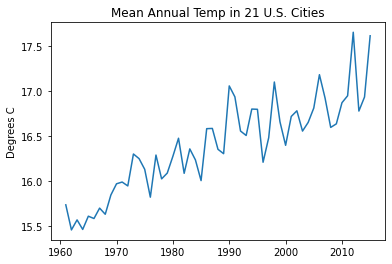

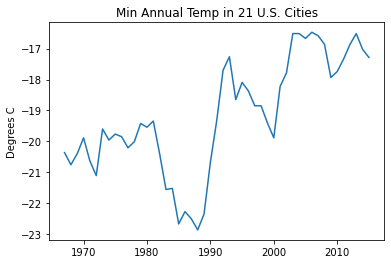

In [16]:
plt.figure(0)
plt.plot(yearly_temps.index, yearly_temps['Mean T'])
plt.title('Mean Annual Temp in 21 U.S. Cities')
plt.figure(1)
plt.plot(yearly_temps['Min T'].rolling(7).mean()) # The Pandas method `rolling` 
plt.title('Min Annual Temp in 21 U.S. Cities')
for i in range(2):
    plt.figure(i)
    plt.ylabel('Degrees C')

While visualizing the relationship between two series can be informative, it is often useful to look at those relationships more
quantitatively. 


Let's start by looking at the correlations between years and the seven-year rolling averages of the `minimum,
maximum, and mean temperatures`. 

Before computing the correlations, we first update the series in `yearly_temps` to contain rolling averages and then convert the year values from strings to integers.

The code


In [17]:
num_years = 7
for label in ['Min T', 'Max T', 'Mean T']:
     yearly_temps[label] = yearly_temps[label].rolling(num_years).mean()
yearly_temps.corr()

,Mean T,Max T,Min T
Mean T,1.000000,0.943003,0.679605
Max T,0.943003,1.000000,0.629268
Min T,0.679605,0.629268,1.000000


All of the summary temperature values are `positively` correlated with the year, with the `mean` temperatures the most `strongly`
correlated. 

That raises the question of how much of the variance in the rolling average of the mean temperatures is explained by the
year. 

The following code prints the coefficient of determination


In [18]:
def r_squared(measured, predicted):
    """Assumes measured a one-dimensional array of measured values
                predicted a one-dimensional array of predicted values
        Returns coefficient of determination"""
    estimated_error = ((predicted - measured)**2).sum()
    mean_of_measured = measured.sum()/len(measured)
    variability = ((measured - mean_of_measured)**2).sum()
    return 1 - estimated_error/variability

In [19]:
import numpy as np
indices = np.isfinite(yearly_temps['Mean T'])

# a linear model  t=a*Year+b
model = np.polyfit(list(yearly_temps.index[indices]),
                    list(yearly_temps['Mean T'][indices]), 1)


print(r_squared(yearly_temps['Mean T'][indices],
                 np.polyval(model, yearly_temps.index[indices])))

0.9397957026458451


Since some of the values in the Mean series are `NaN`, we first use the function `np.isfinite` to get the indices of the `non-NaN` values in `yearly_temps['Mean T']`.

We then build a linear model and finally use the `r_squared` function to compare the results predicted by the model to the actual temperatures. 

The linear model relating years to the seven-year rolling average mean temperature explains nearly $95\%$ of the variance

#####  summary data for each city

If you happen to live in the U.S. or plan to travel to the U.S., you might be more interested in looking at the data by **city** rather than year.

Let's start by producing a new DataFrame that provides **summary** data for each **city**. 

In deference to our American readers, we convert all temperatures to `Fahrenheit` by applying a `conversion function` to all values in `city_temps`. 

The penultimate line adds a column showing how extreme the temperature variation is.


Executing this code produces the DataFrame 

In [20]:
temperatures = pd.read_csv('./data/US_temperatures.csv',parse_dates=["Date"])
temperatures.set_index('Date', drop = True, inplace = True)
temperatures

,Albuquerque,Baltimore,Boston,Charlotte,Chicago,...,San Francisco,San Juan,Seattle,St Louis,Tampa
Date,,,,,,,,,,,
1961-01-01,-0.55,3.35,1.95,7.25,-4.75,...,8.05,24.45,3.10,-0.55,15.00
1961-01-02,-2.50,0.00,-0.80,4.45,-2.50,...,5.85,25.00,0.55,-0.55,13.60
1961-01-03,-2.50,0.85,-3.05,2.20,-10.80,...,4.70,24.75,0.00,0.30,11.95
...,...,...,...,...,...,...,...,...,...,...,...
2015-12-29,-2.15,9.45,0.05,17.20,1.15,...,7.20,26.10,3.90,1.40,26.10
2015-12-30,-2.75,9.70,-0.50,18.05,-2.15,...,6.90,25.80,2.30,0.60,25.55
2015-12-31,-0.75,9.75,4.45,15.30,-3.80,...,7.25,25.55,1.75,-0.25,25.55


In [21]:
temperatures = pd.read_csv('./data/US_temperatures.csv')
temperatures.drop('Date', axis = 'columns', inplace = True)
maxes = temperatures.max()
mins = temperatures.min()
means = round(temperatures.mean(), 2)
city_temps = pd.DataFrame({'Min T':mins, 'Max T':maxes, 'Mean T':means})
city_temps = city_temps.apply(lambda x: 1.8*x + 32) # temperatures to Fahrenheit
city_temps['Max-Min'] = city_temps['Max T'] - city_temps['Min T']
city_temps

,Min T,Max T,Mean T,Max-Min
Albuquerque,-3.46,89.96,57.110,93.42
Baltimore,-0.04,93.47,55.562,93.51
Boston,1.04,92.48,51.620,91.44
...,...,...,...,...
Seattle,12.02,86.99,52.376,74.97
St Louis,-8.50,96.98,56.408,105.48
Tampa,28.94,89.06,72.878,60.12


In [35]:
city_temps.sort_meant=city_temps.sort_values('Mean T', ascending = False)
city_temps.sort_meant

,Min T,Max T,Mean T,Max-Min
San Juan,68.99,88.97,80.492,19.98
Miami,37.94,90.05,76.604,52.11
Phoenix,32.45,106.52,73.904,74.07
...,...,...,...,...
Boston,1.04,92.48,51.620,91.44
Chicago,-18.04,92.48,49.622,110.52
Detroit,-12.01,89.51,49.550,101.52


In [31]:
print(city_temps.sort_meant.to_string())

               Min T   Max T  Mean T  Max-Min
San Juan       68.99   88.97  80.492    19.98
Miami          37.94   90.05  76.604    52.11
Phoenix        32.45  106.52  73.904    74.07
Tampa          28.94   89.06  72.878    60.12
New Orleans    18.95   90.95  68.882    72.00
Las Vegas      19.49  105.98  67.964    86.49
Dallas          8.51   97.52  66.092    89.01
San Diego      43.07   92.03  64.130    48.96
Los Angeles    42.98   94.01  63.158    51.03
Charlotte       9.50   90.50  60.512    81.00
San Francisco  30.56   86.00  57.632    55.44
Albuquerque    -3.46   89.96  57.110    93.42
St Louis       -8.50   96.98  56.408   105.48
Baltimore      -0.04   93.47  55.562    93.51
Philadelphia    0.50   92.48  55.364    91.98
New York        3.56   91.04  54.194    87.48
Portland       11.03   89.96  54.068    78.93
Seattle        12.02   86.99  52.376    74.97
Boston          1.04   92.48  51.620    91.44
Chicago       -18.04   92.48  49.622   110.52
Detroit       -12.01   89.51  49.5

To visualize differences among cities, we generated the plot, 

Using the code:


<AxesSubplot:>

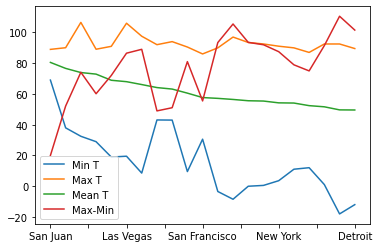

In [41]:
city_temps.sort_meant.plot()

Text(0, 0.5, 'Degrees F')

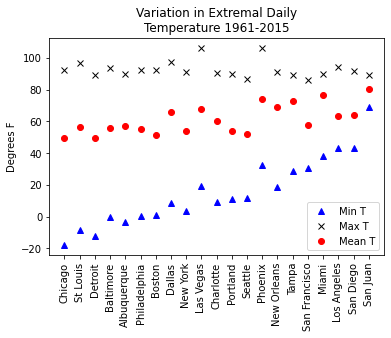

In [39]:
plt.plot(city_temps.sort_values('Max-Min', ascending=False)['Min T'], 'b^', label = 'Min T')
plt.plot(city_temps.sort_values('Max-Min', ascending=False)['Max T'],   'kx', label = 'Max T')
plt.plot(city_temps.sort_values('Max-Min', ascending=False)['Mean T'],     'ro', label = 'Mean T')
plt.xticks(rotation = 'vertical')
plt.legend()
plt.title('Variation in Extremal Daily\nTemperature 1961-2015')
plt.ylabel('Degrees F')

Notice that we used the sort order `Max - Min` for all three series. The use of `ascending = False` reverses the default sorting order.

Looking at this plot we can see, among other things, that

* Across cities, the minimum temperature differs much more than the maximum temperature. Because of this, `Max–Min` (the sort
order) is strongly positively correlated with the minimum temperature.

* It never gets very hot in San Francisco or Seattle.

* The temperature in San Juan is close to constant.

* The temperature in Chicago is not close to constant. It gets both quite hot and frighteningly cold in the windy city

* It gets uncomfortably hot in both Phoenix and Las Vegas.

* San Francisco and Albuquerque have about the same mean temperature, but radically different minima and maxima


###  5.2 Fossil Fuel Consumption 

The file `global-fossil-fuel-consumption.csv` contains data about the yearly con-sumption of fossil fuels on Earth from 1965 and 2015. 

* https://ourworldindata.org/grapher/global-fossil-fuel-consumption

The Data

In [ ]:
# %load ./data/global-fossil-fuel-consumption.csv
Year,Coal,Crude Oil,Natural Gas
1965,16151.96017,18054.69004,6306.370076
1966,16332.01679,19442.23715,6871.686791
1967,16071.18119,20830.13575,7377.525476
1968,16312.60576,22613.21746,8046.478672
1969,16825.99292,24534.98916,8835.591838
1970,17065.27113,26649.8116,9614.414364
1971,16971.04648,28233.71612,10289.89468
1972,17161.86462,30399.20981,10858.55694
1973,17673.14043,32775.00958,11374.03922
1974,17687.80045,32299.54837,11652.60482
1975,18031.66073,31973.18489,11657.59717
1976,18688.42129,34064.96456,12350.85663
1977,19241.4531,35224.40759,12756.89778
1978,19456.78595,36354.28057,13291.68232
1979,20359.51044,36953.1491,14121.9509
1980,20856.53098,35506.32689,14238.31962
1981,21148.79702,34228.87205,14395.89609
1982,21384.22049,33177.85701,14473.22634
1983,22040.19421,32981.31709,14706.11331
1984,22997.47253,33746.54047,15912.38739
1985,23906.3229,33792.84203,16263.14014
1986,24182.95534,34819.31693,16421.36448
1987,25145.10228,35532.11408,17289.17958
1988,25889.97449,36735.8996,18083.52241
1989,26152.07667,37343.11239,18902.85595
1990,25845.88485,37736.94729,19486.64542
1991,25561.41954,37763.14824,19984.58677
1992,25478.81089,38422.53103,20076.92098
1993,25580.92144,38179.42324,20275.09431
1994,25729.64169,39021.80173,20405.36342
1995,25867.8533,39555.43054,21121.78818
1996,26516.28457,40480.1731,22143.41796
1997,26549.71899,41544.67299,22082.05319
1998,26351.79429,41768.48384,22485.93806
1999,26492.77461,42510.09274,23107.57158
2000,27403.94562,43038.62001,24019.89227
2001,27851.05371,43421.10755,24367.11133
2002,28936.6423,43796.55068,25108.12839
2003,31475.58334,44803.21017,25769.17552
2004,33656.31109,46503.96733,26752.16794
2005,36118.94545,47115.72728,27537.09099
2006,37979.81684,47732.19992,28347.57835
2007,40143.91171,48471.73162,29580.25097
2008,40712.5427,48250.64229,30321.37836
2009,40088.33994,47422.36853,29477.9263
2010,41932.74507,48949.72046,31759.12422
2011,43948.96889,49455.27172,32410.44868
2012,44129.62497,50065.86499,33270.53388
2013,44953.01385,50698.38455,33714.94785
2014,44916.83781,51109.97172,33986.84723
2015,43786.8458,52053.27008,34741.88349
2016,43101.23216,53001.86598,35741.82987
2017,43397.13549,53752.27638,36703.96587

The DataFrame has a large number of rows or columns, print will replace columns and/or rows in the center of the DataFrame with **ellipses**

In [56]:
import pandas as pd 
emissions = pd.read_csv('./data/global-fossil-fuel-consumption.csv') 
emissions

,Year,Coal,Crude Oil,Natural Gas
0,1965,16151.96017,18054.69004,6306.370076
1,1966,16332.01679,19442.23715,6871.686791
2,1967,16071.18119,20830.13575,7377.525476
...,...,...,...,...
50,2015,43786.84580,52053.27008,34741.883490
51,2016,43101.23216,53001.86598,35741.829870
52,2017,43397.13549,53752.27638,36703.965870


In [57]:
emissions = pd.read_csv('./data/global-fossil-fuel-consumption.csv',parse_dates=["Year"]) 
emissions["Year"] =emissions["Year"].dt.year 
emissions.set_index("Year", drop = True, inplace = True)
emissions

,Coal,Crude Oil,Natural Gas
Year,,,
1965,16151.96017,18054.69004,6306.370076
1966,16332.01679,19442.23715,6871.686791
1967,16071.18119,20830.13575,7377.525476
...,...,...,...
2015,43786.84580,52053.27008,34741.883490
2016,43101.23216,53001.86598,35741.829870
2017,43397.13549,53752.27638,36703.965870


let’s replace the **columns** showing the consumption of **each kind** of fuel by **two** columns,

* **Fuels**: the **sum** of the three 

* **Roll F**: the five-year `rolling average` of the sum 

In [58]:
# the new column row: Fuels
emissions['Fuels'] = emissions.sum(axis = 'columns')

# the new colume: the five-year rolling average of the sum.
num_years = 5 
emissions['Roll F'] = emissions['Fuels'].rolling(num_years).mean() 
emissions = emissions.round()

In [59]:
emissions 

,Coal,Crude Oil,Natural Gas,Fuels,Roll F
Year,,,,,
1965,16152.0,18055.0,6306.0,40513.0,NaN
1966,16332.0,19442.0,6872.0,42646.0,NaN
1967,16071.0,20830.0,7378.0,44279.0,NaN
...,...,...,...,...,...
2015,43787.0,52053.0,34742.0,130582.0,128649.0
2016,43101.0,53002.0,35742.0,131845.0,129855.0
2017,43397.0,53752.0,36704.0,133853.0,131132.0


We can plot this data using

<AxesSubplot:xlabel='Year'>

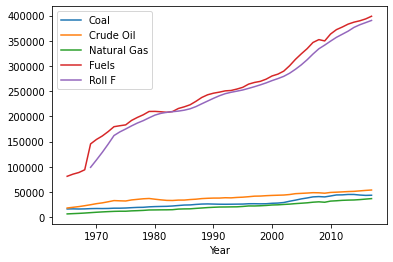

In [47]:
emissions.plot()

<AxesSubplot:xlabel='Year'>

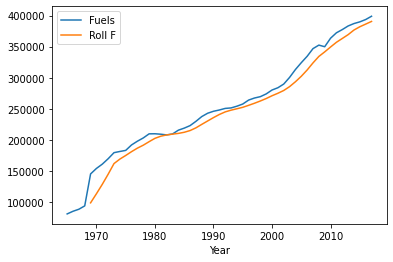

In [48]:
emissions.plot(y=['Fuels','Roll F'])

Text(0, 0.5, 'Consumption')

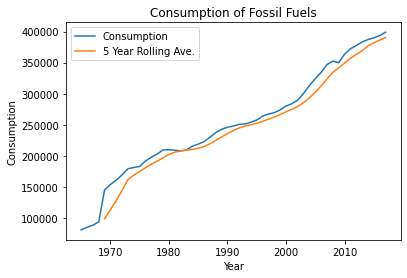

In [49]:
import matplotlib.pyplot as plt
plt.plot(emissions.index, emissions['Fuels'],  label = 'Consumption')
plt.plot(emissions.index, emissions['Roll F'],  label = str(num_years) + ' Year Rolling Ave.') 
plt.legend()
plt.title('Consumption of Fossil Fuels') 
plt.xlabel('Year')
plt.ylabel('Consumption')

While there are  `a few small dips` in consumption (e.g., around the `2008 fi-nancial crisis`), the upward trend is unmistakable. 

The scientific community has reached consensus that there is an association between this rise in fuel consumption and the rise in `the average temperature` on the planet.

Let’s see how it relates to the temperatures in the `21 U.S. cities` we looked at in `Section 23.5.1`.

Recall that `yearly_temps` was bound to the `DataFrame`

In [50]:
yearly_temps

,Mean T,Max T,Min T
Year,,,
1961,NaN,NaN,NaN
1962,NaN,NaN,NaN
1963,NaN,NaN,NaN
...,...,...,...
2013,16.912914,40.078571,-16.514286
2014,16.914605,40.200000,-17.021429
2015,17.059644,40.278571,-17.285714


Wouldn't it be nice if there were an easy way to combine `yearly_temps` and `emissions`? 

Pandas' [merge](https://pandas.pydata.org/docs/reference/api/pandas.merge.html#pandas.merge) function does just that. 

The code:


In [51]:
merged_df = pd.merge(yearly_temps, emissions, left_index = True,right_index=True)
merged_df

,Mean T,Max T,Min T,Coal,Crude Oil,Natural Gas,Fuels,Roll F
Year,,,,,,,,
1965,NaN,NaN,NaN,16152.0,18055.0,6306.0,81026.0,NaN
1966,NaN,NaN,NaN,16332.0,19442.0,6872.0,85292.0,NaN
1967,15.589849,36.742857,-20.364286,16071.0,20830.0,7378.0,88558.0,NaN
...,...,...,...,...,...,...,...,...
2013,16.912914,40.078571,-16.514286,44953.0,50698.0,33715.0,383187.0,369226.0
2014,16.914605,40.200000,-17.021429,44917.0,51110.0,33987.0,387088.0,376676.0
2015,17.059644,40.278571,-17.285714,43787.0,52053.0,34742.0,389813.0,381935.0


The DataFrame contains the union of the columns appearing in `yearly_temps` and `emissions` but includes only rows built from the
rows in `yearly_temps` and `emissions` that contain the same value in the Year column.

Now that we have the emissions and temperature information in the same DataFrame, it is easy to look at how things are `correlated`
with each other.

Firstly,we conver `index` to the `column`

In [52]:
merged_df.reset_index(inplace=True)
merged_df

,Year,Mean T,Max T,Min T,Coal,Crude Oil,Natural Gas,Fuels,Roll F
0,1965,NaN,NaN,NaN,16152.0,18055.0,6306.0,81026.0,NaN
1,1966,NaN,NaN,NaN,16332.0,19442.0,6872.0,85292.0,NaN
2,1967,15.589849,36.742857,-20.364286,16071.0,20830.0,7378.0,88558.0,NaN
...,...,...,...,...,...,...,...,...,...
48,2013,16.912914,40.078571,-16.514286,44953.0,50698.0,33715.0,383187.0,369226.0
49,2014,16.914605,40.200000,-17.021429,44917.0,51110.0,33987.0,387088.0,376676.0
50,2015,17.059644,40.278571,-17.285714,43787.0,52053.0,34742.0,389813.0,381935.0


Then,look at how things are correlated with each other

In [53]:
print(merged_df.corr().round(2).to_string())

             Year  Mean T  Max T  Min T  Coal  Crude Oil  Natural Gas  Fuels  Roll F
Year         1.00    0.97   0.92   0.71  0.95       0.96         0.99   0.98    0.98
Mean T       0.97    1.00   0.94   0.68  0.88       0.95         0.95   0.95    0.96
Max T        0.92    0.94   1.00   0.63  0.91       0.94         0.92   0.95    0.96
Min T        0.71    0.68   0.63   1.00  0.70       0.73         0.73   0.71    0.70
Coal         0.95    0.88   0.91   0.70  1.00       0.91         0.97   0.95    0.96
Crude Oil    0.96    0.95   0.94   0.73  0.91       1.00         0.97   0.99    0.98
Natural Gas  0.99    0.95   0.92   0.73  0.97       0.97         1.00   0.99    0.99
Fuels        0.98    0.95   0.95   0.71  0.95       0.99         0.99   1.00    0.99
Roll F       0.98    0.96   0.96   0.70  0.96       0.98         0.99   0.99    1.00


We see that `global fuel consumption` in previous years is indeed `highly correlated` with both the mean and maximum `temperature`in
these U.S. cities. 

Does this imply that increased fuel consumption is causing the rise in temperature? It does not. 

Notice that both are highly correlated with year. Perhaps some lurking variable is also correlated with year and is the causal factor. 

What we can say from a `statistical` perspective, is that the data does `not contradict` the widely accepted `scientific hypothesis` that 

* `the increased use of fossil fuels generates greenhouse gasses that have caused temperatures to rise.`


## Further Reading

This concludes our brief look at Pandas. We have only scratched the surface of what it offers. We will use it later in the book and
introduce a few more features. If you want to learn more, there are many online resources and some excellent inexpensive books.

* The website https://www.dataschool.io/best-python-pandas-resources/ lists some of these



* The officical utorials: https://pandas.pydata.org/docs/getting_started/intro_tutorials/index.html